In [1]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from models import Generator

from Girl2animeDataset import Girl2animeDataset
from torchvision.utils import make_grid

from PIL import Image

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [2]:
#upload pertreined model
path_weights_G_AB = 'pretrained_weights/G_AB_epoch_99.pth'
path_weights_F_BA = 'pretrained_weights/F_BA_epoch_99.pth'

model = {
    "G_AB": Generator().to(device),
    "F_BA": Generator().to(device),
}
model["G_AB"].load_state_dict(torch.load(path_weights_G_AB))
model["F_BA"].load_state_dict(torch.load(path_weights_F_BA))

<All keys matched successfully>

In [3]:
#load image
import requests
from io import BytesIO
url = "https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTY4MDk3MDc5NjQ0NjYxMDA5/greta-thunberg-looks-on-during-a-meeting-in-the-garden-of-the-hotel-de-lassay-ahead-of-a-visit-of-the-french-national-assembly-in-paris-photo-credit-should-read-lionel-bonaventureafp-via-getty-imagesj.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

In [4]:
transform = transforms.Compose([
    transforms.Resize(128,Image.ANTIALIAS),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

image_tensor = torch.unsqueeze(transform(img),0).to(device)

fake_image = model["G_AB"](image_tensor)
rec_image = model["F_BA"](fake_image)

image_tensor = 0.5 * (image_tensor.detach() + 1.0)
fake_image = 0.5 * (fake_image.detach() + 1.0)
rec_image = 0.5 * (rec_image.detach() + 1.0)

/tmp/ipykernel_28372/1375602423.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  transforms.Resize(128,Image.ANTIALIAS),
/home/weinstein/.virtualenvs/PythonProjects/lib/python3.8/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


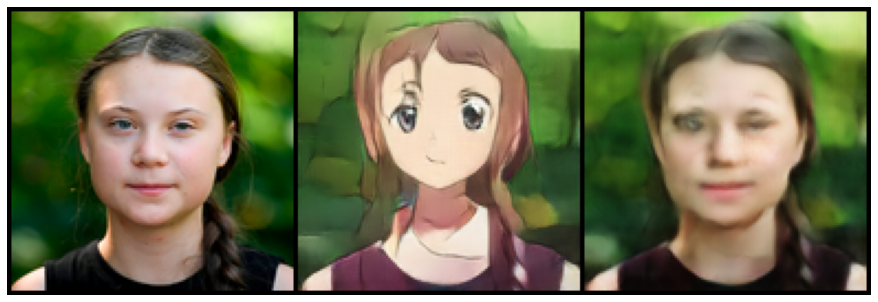

In [5]:
image_grid = torch.cat([image_tensor, fake_image, rec_image]).cpu()
fig = plt.figure(figsize=(4*3/1, 4), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(make_grid(image_grid, nrow=3).permute(1, 2, 0), aspect='auto')
plt.show()